In [33]:
# Import Dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy import stats

In [135]:
#Read CSV file
oxford_data = pd.read_csv("Resources/oxford_data.csv", low_memory=False)

# Format 'Date' from YYYYMMDD to DD/MM/YYYY
oxford_data['Date'] = pd.to_datetime(oxford_data['Date'], format='%Y%m%d')
oxford_data.head(10)

,Unnamed: 0,CountryName,Date,C1_School closing,C2_Workplace closing,C6_Stay at home requirements,E1_Income support,E3_Fiscal measures,H6_Facial Coverings,ConfirmedCases,ConfirmedDeaths,H1_Public information campaigns,H3_Contact tracing,M1_Wildcard
0,0,Brazil,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1,Brazil,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,2,Brazil,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,3,Brazil,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,4,Brazil,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5,5,Brazil,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
6,6,Brazil,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
7,7,Brazil,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
8,8,Brazil,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
9,9,Brazil,2020-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [178]:
# Create new dataframe with `CountryName` as index
oxford_data = oxford_data.set_index("CountryName")

oxford_data

KeyError: "None of ['CountryName'] are in the columns"

In [157]:
# Create new dataframe with the 12 countries of interest
countries = oxford_data.loc[["Brazil","China", "Italy", "Japan", \
                             "New Zealand", "Sweden", "United Kingdom", "United States"]]

oxford_df = pd.DataFrame(countries, columns = ["Date", "C1_School closing", "C2_Workplace closing", \
                                               "C6_Stay at home requirements", "E1_Income support", "E3_Fiscal measures", \
                                               "H6_Facial Coverings","H1_Public information campaigns", "ConfirmedCases", "ConfirmedDeaths", ])
oxford_df = oxford_df.reset_index()

# Format 'Date' from YYYYMMDD to DD/MM/YYYY
oxford_df['Date'] = pd.to_datetime(oxford_df['Date'], format='%Y%m%d')
oxford_df

,CountryName,Date,C1_School closing,C2_Workplace closing,C6_Stay at home requirements,E1_Income support,E3_Fiscal measures,H6_Facial Coverings,H1_Public information campaigns,ConfirmedCases,ConfirmedDeaths
0,Brazil,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Brazil,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Brazil,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Brazil,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Brazil,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
19323,United States,2020-10-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10805.0,68.0
19324,United States,2020-10-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11041.0,68.0
19325,United States,2020-10-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11477.0,77.0
19326,United States,2020-10-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11806.0,77.0


In [220]:
# group complete data by Country Name
grouped_country = oxford_df.groupby(['CountryName'])

# average Confirmed Death
ConfirmedDeaths = grouped_country['ConfirmedDeaths'].mean().astype(int)

information_campaigns= grouped_country['H1_Public information campaigns'].mean()

ConfirmedCases= grouped_country['ConfirmedCases'].mean().astype(int)

In [221]:
Country_Info_dataframe=pd.DataFrame({
    'ConfirmedDeaths': ConfirmedDeaths,
    'information_campaigns':information_campaigns,
    'ConfirmedCases':ConfirmedCases,
})

Country_Info_dataframe

,ConfirmedDeaths,information_campaigns,ConfirmedCases
CountryName,,,
Brazil,52141,1.701342,1568971
China,3674,1.939189,74345
Italy,23172,1.797297,182612
Japan,696,1.771044,28217
New Zealand,14,1.858108,912
Sweden,3360,1.548173,43821
United Kingdom,12599,1.829831,102446
United States,3849,1.607152,110405


0 - no Covid-19 public information campaign
1 - public officials urging caution about Covid-19
2- coordinated public information campaign (eg across traditional and social media)
Blank - no data , 

on Average most countries were about 

confirmed Deaths vs. information campaign

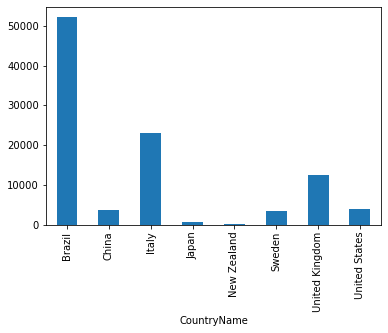

In [222]:
Country_Info_dataframe['ConfirmedDeaths'].plot(kind='bar')
scale_factor = 1

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

plt.xlim(xmin * scale_factor, xmax * scale_factor)
plt.ylim(ymin * scale_factor, ymax * scale_factor)

plt.show()

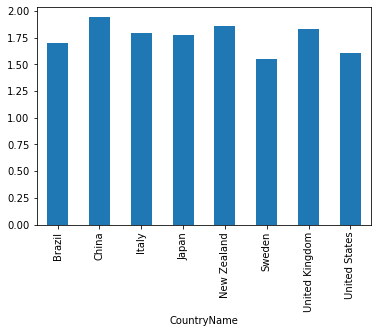

In [223]:
Country_Info_dataframe['information_campaigns'].plot(kind='bar')

### China, New Zealand and the United Kingdom had information campaigns close to 2, which means across all media.

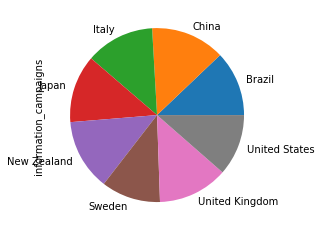

In [224]:
Country_Info_dataframe.groupby('CountryName')['information_campaigns'].mean().plot(kind="pie")

In [225]:
#countries called out
US=oxford_df.loc[oxford_df["CountryName"]=='United States']
Brazil=oxford_df.loc[oxford_df["CountryName"]=='Brazil']
China=oxford_df.loc[oxford_df["CountryName"]=='China']
Italy=oxford_df.loc[oxford_df["CountryName"]=='Italy']
Japan=oxford_df.loc[oxford_df["CountryName"]=='Japan']
NewZealand=oxford_df.loc[oxford_df["CountryName"]=='New Zealand']
Sweden=oxford_df.loc[oxford_df["CountryName"]=='Sweden']
UK=oxford_df.loc[oxford_df["CountryName"]=='United Kingdom']

In [226]:
US

,CountryName,Date,C1_School closing,C2_Workplace closing,C6_Stay at home requirements,E1_Income support,E3_Fiscal measures,H6_Facial Coverings,H1_Public information campaigns,ConfirmedCases,ConfirmedDeaths
3322,United States,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3323,United States,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3324,United States,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3325,United States,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3326,United States,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
19323,United States,2020-10-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10805.0,68.0
19324,United States,2020-10-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11041.0,68.0
19325,United States,2020-10-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11477.0,77.0
19326,United States,2020-10-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11806.0,77.0


###Comparision of Public Information campaign

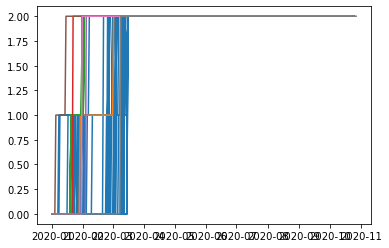

In [227]:
plt.plot(US ['Date'], US ['H1_Public information campaigns'])
plt.plot(Brazil ['Date'], Brazil ['H1_Public information campaigns'])
plt.plot(UK ['Date'], UK ['H1_Public information campaigns'])
plt.plot(NewZealand ['Date'], NewZealand ['H1_Public information campaigns'])
plt.plot(Japan ['Date'], Japan ['H1_Public information campaigns'])
plt.plot(China ['Date'], China ['H1_Public information campaigns'])
plt.plot(Italy ['Date'], Italy ['H1_Public information campaigns'])
plt.plot(Sweden ['Date'], Sweden ['H1_Public information campaigns'])

scale_factor = .01


plt.show()



### information by date in the US

Text(0, 0.5, 'Information')

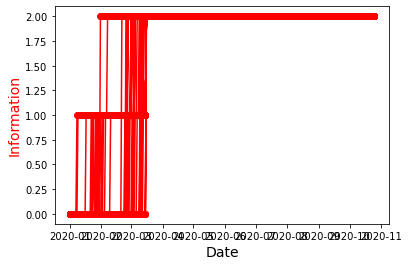

In [189]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(US['Date'], US['H1_Public information campaigns'], color="red", marker="o")
# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("Information",color="red",fontsize=14)

### Information Vs. Date in UK, Sweden and Italy

Text(0, 0.5, 'Information')

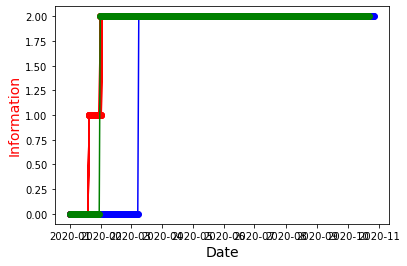

In [209]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(UK['Date'], UK['H1_Public information campaigns'], color="red", marker="o")
ax.plot(Sweden['Date'], Sweden['H1_Public information campaigns'], color="Blue", marker="o")
ax.plot(Italy['Date'], Italy['H1_Public information campaigns'], color="Green", marker="o")
# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("Information",color="red",fontsize=14)

### Brazil

Text(0, 0.5, 'Information')

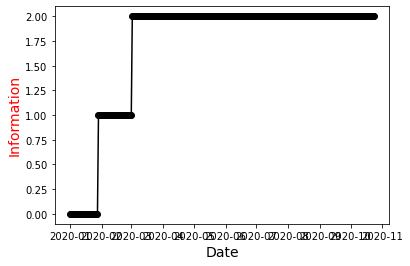

In [211]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
ax.plot(Brazil['Date'], Brazil['H1_Public information campaigns'], color="black", marker="o")
# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("Information",color="red",fontsize=14)

### Japan and China

Text(0, 0.5, 'Information')

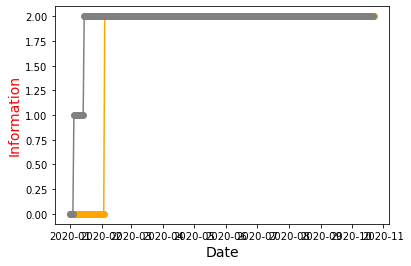

In [214]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
ax.plot(Japan['Date'], Japan['H1_Public information campaigns'], color="Orange", marker="o")
ax.plot(China['Date'], China['H1_Public information campaigns'], color="Gray", marker="o")
# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("Information",color="red",fontsize=14)

### United States

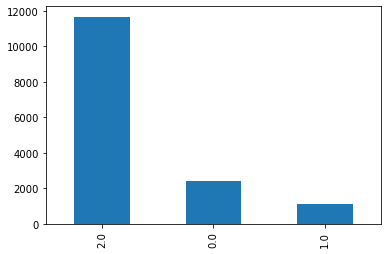

In [155]:
US['H1_Public information campaigns'].value_counts().plot(kind='bar')


### Brazil

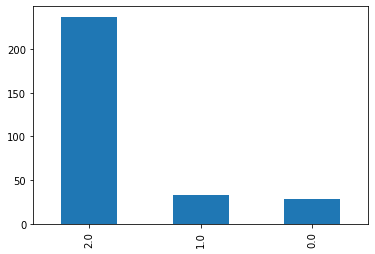

In [94]:
Brazil['H1_Public information campaigns'].value_counts().plot(kind='bar')

### Japan

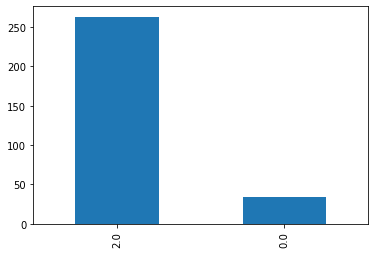

In [96]:
Japan['H1_Public information campaigns'].value_counts().plot(kind='bar')

### China

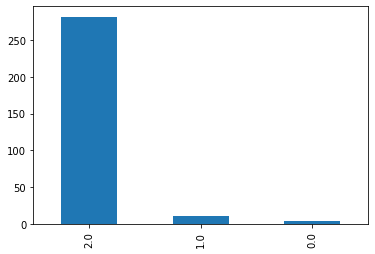

In [95]:
China['H1_Public information campaigns'].value_counts().plot(kind='bar')

### United Kingdom

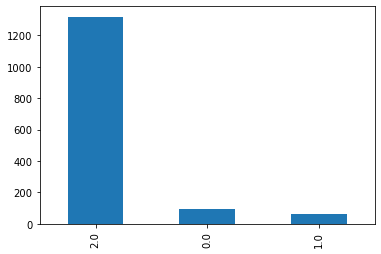

In [97]:
UK['H1_Public information campaigns'].value_counts().plot(kind='bar')

### Sweden

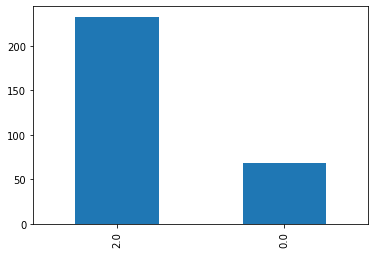

In [98]:
Sweden['H1_Public information campaigns'].value_counts().plot(kind='bar')

### Italy

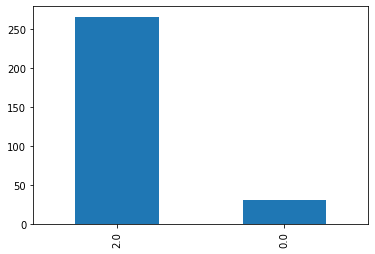

In [99]:
Italy['H1_Public information campaigns'].value_counts().plot(kind='bar')

### New Zealand

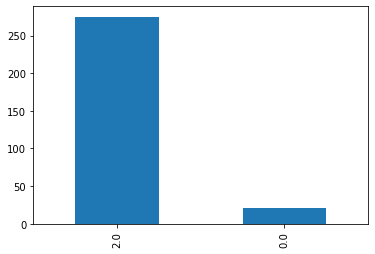

In [100]:
NewZealand['H1_Public information campaigns'].value_counts().plot(kind='bar')